In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [149]:
tabla_1 = pd.read_csv("BARD_1976-1993_KPVT_tilts.csv") 
tabla_2 = pd.read_csv('BARD_1992-1999_SPMG_tilts.csv') 
tabla_3 = pd.read_csv('BARD_1996-2010_MDI_tilts.csv') 
tabla_4 = pd.read_csv('BARD_2010-2016_HMI_tilts.csv')
tabla_1

,ReferenceDay,Year,Month,Day,Hour,Minute,Second,BMRLabel,PFlux,PArea,...,Tilt_rel,Tilt_abs,HH_21n,AH_21n,HH_21s,AH_21s,HH_22n,AH_22n,HH_22s,AH_22s
0,2203,1976,1,13,17,26,59,1,6.690000e+21,1.590000e+19,...,1.027189,1.027189,False,False,False,False,False,False,False,False
1,2236,1976,2,15,18,19,8,3,2.370000e+21,1.170000e+19,...,17.824701,17.824701,False,False,False,False,False,False,False,False
2,2241,1976,2,20,18,43,18,4,2.490000e+21,1.440000e+19,...,17.516526,17.516526,False,False,False,False,False,False,False,False
3,2263,1976,3,13,21,24,36,8,3.080000e+21,1.270000e+19,...,26.837889,-153.162111,False,False,True,False,False,False,False,False
4,2415,1976,8,12,21,14,0,13,1.790000e+21,9.400000e+18,...,-22.066642,-22.066642,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4409,8498,1993,4,8,19,0,36,8152,2.580000e+21,1.070000e+19,...,27.958084,27.958084,False,False,False,False,False,False,True,False
4410,8499,1993,4,9,18,29,14,8153,2.230000e+22,6.530000e+19,...,8.489700,8.489700,False,False,False,False,False,False,True,False
4411,8499,1993,4,9,18,29,14,8156,3.170000e+21,1.190000e+19,...,-10.645670,169.354330,False,False,False,False,True,False,False,False
4412,8498,1993,4,8,19,0,36,8158,1.400000e+22,8.410000e+19,...,-21.305651,158.694349,False,False,False,False,True,False,False,False


In [150]:
if os.path.exists('Tiempo_vs_BMRLatitude') and os.path.exists('Tiempo_vs_BMRLatitude'):
    None
else:
    os.mkdir('Tiempo_vs_BMRLatitude')
    os.mkdir('BMRLongitude_vs_BMRLatitude')

# KPVT (1976 - 1993)

In [151]:
tiempo_1 = pd.to_datetime(tabla_1.loc[:,['Year','Month','Day','Hour','Minute','Second']])
tabla_1['Date'] = tiempo_1

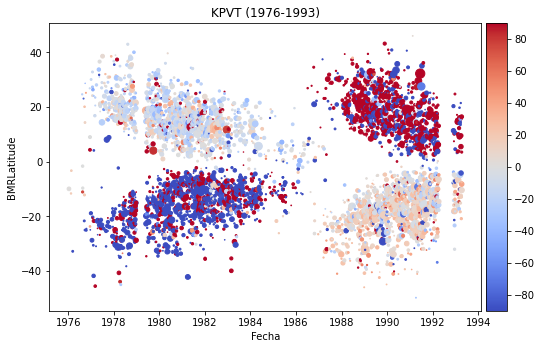

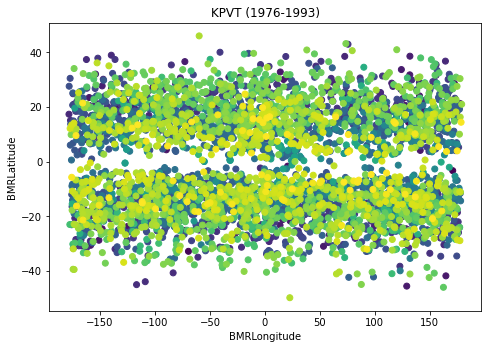

In [152]:
flux = tabla_1['BMRFlux']

# Normalizar flujo

def minmax_norm(f):
    return (f - f.min()) / (f.max() - f.min())

flux_norm = 100 * minmax_norm(flux)

# plot

# spoer
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
c = ax.scatter(tiempo_1, tabla_1['BMRLatitude'], s=flux_norm, c=tabla_1['Tilt_abs'], cmap='coolwarm', vmin=-90, vmax=90)
ax.set_title('KPVT (1976-1993)')
ax.set_xlabel('Fecha')
ax.set_ylabel('BMRLatitude')
colorbar_ax = fig.add_axes([1.11, 0.1, 0.05, 1])
fig.colorbar(c, cax=colorbar_ax)
fig.savefig('Tiempo_vs_BMRLatitude/KPVT.png', bbox_inches='tight')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
ax.scatter(tabla_1['BMRLongitude'], tabla_1['BMRLatitude'], c=tiempo_1, cmap='viridis')
ax.set_title('KPVT (1976-1993)')
ax.set_xlabel('BMRLongitude')
ax.set_ylabel('BMRLatitude')
fig.savefig('BMRLongitude_vs_BMRLatitude/KPVT.png', bbox_inches='tight')
plt.show()

In [153]:
mascara_y = tabla_1['Year'] == 1976
mascara_m = np.logical_and(tabla_1['Month'] > 2*2, tabla_1['Month'] < 2*2+3)
data_d = tabla_1.loc[np.logical_and(mascara_y, mascara_m)]

mascara_hh21 = np.logical_or(data_d['HH_21n'], data_d['HH_21s'])
mascara_hh22 = np.logical_or(data_d['HH_22n'], data_d['HH_22s'])
mascara_hh = np.logical_or(mascara_hh21, mascara_hh22)

mascara_ah21 = np.logical_or(data_d['AH_21n'], data_d['AH_21s'])
mascara_ah22 = np.logical_or(data_d['AH_22n'], data_d['AH_22s'])
mascara_ah = np.logical_or(mascara_ah21, mascara_ah22)

data = data_d.loc[np.logical_or(mascara_hh,mascara_ah)]

In [154]:
if os.path.exists('KPVT_(1976-1993)') and os.path.exists('KPVT_(1976-1993)/lat-t') and os.path.exists('KPVT_(1976-1993)/lat-long'):
    sys.exit('La carpeta ya fue creada')

os.mkdir('KPVT_(1976-1993)')
os.mkdir('KPVT_(1976-1993)/lat-t')
os.mkdir('KPVT_(1976-1993)/lat-long')

for i in range(1976,1994):
    mascara_y = tabla_1['Year'] == i
    for j in range(6):
        mascara_m = np.logical_and(tabla_1['Month'] > 2*j, tabla_1['Month'] < 2*j+3)
        data_d = tabla_1.loc[np.logical_and(mascara_y, mascara_m)]

        mascara_hh21 = np.logical_or(data_d['HH_21n'], data_d['HH_21s'])
        mascara_hh22 = np.logical_or(data_d['HH_22n'], data_d['HH_22s'])
        mascara_hh = np.logical_or(mascara_hh21, mascara_hh22)

        mascara_ah21 = np.logical_or(data_d['AH_21n'], data_d['AH_21s'])
        mascara_ah22 = np.logical_or(data_d['AH_22n'], data_d['AH_22s'])
        mascara_ah = np.logical_or(mascara_ah21, mascara_ah22)

        data = data_d.loc[np.logical_or(mascara_hh,mascara_ah)]
        data_hale = data.loc[mascara_hh]
        data_ahale = data.loc[mascara_ah]


        if data.shape[0] > 0:

            fig = plt.figure()
            ax = fig.add_axes([0.1,0.1,1,1])
            c = ax.scatter(data['Date'], data['BMRLatitude'], c=data['Tilt_abs'], cmap='coolwarm', vmin=-90, vmax=90)
            ax.set_title('KPVT (1976-1993)')
            ax.set_xlabel('Fecha')
            ax.set_ylabel('BMRLatitude')
            colorbar_ax = fig.add_axes([1.11, 0.1, 0.05, 1])
            fig.colorbar(c, cax=colorbar_ax)
            fig.savefig('KPVT_(1976-1993)/lat-t/'+str(i)+'_'+str(2*j+1)+'_to_'+str(2*j+2)+'Tiempo_vs_BMRLatitude.png', bbox_inches='tight')
            plt.close(fig)

            fig = plt.figure()
            ax = fig.add_axes([0.1,0.1,1,1])
            ax.scatter(data_hale['BMRLongitude'], data_hale['BMRLatitude'], c=data_hale['ReferenceDay'], cmap='coolwarm', marker='o', label='Hale') # Hale
            ax.scatter(data_ahale['BMRLongitude'], data_ahale['BMRLatitude'], c=data_ahale['ReferenceDay'], cmap='coolwarm', marker='s', label='AntiHale' ) # Anti Hale
            ax.legend()
            ax.set_title('KPVT (1976-1993)')
            ax.set_xlabel('BMRLongitude')
            ax.set_ylabel('BMRLatitude')
            fig.savefig('KPVT_(1976-1993)/lat-long/'+str(i)+'_'+str(2*j+1)+'_to_'+str(2*j+2)+'BMRLongitude_vs_BMRLatitude.png', bbox_inches='tight')
            plt.close(fig)
            
        else: None

# SPMG (1992-1999)

In [155]:
tiempo_2 = pd.to_datetime(tabla_2.iloc[:,[1,2,3,4,5,6]])
tabla_2['Date'] = tiempo_2
indices_2 = tabla_2.set_index(['Date'])

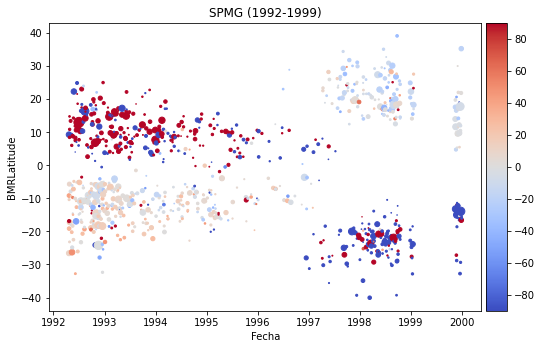

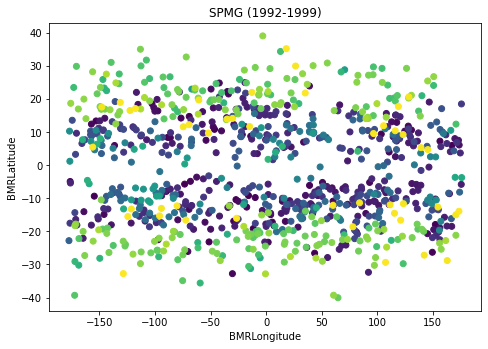

In [156]:
flux = tabla_2['BMRFlux']

# Normalizar flujo

def minmax_norm(df_input):
    return (flux - flux.min()) / (flux.max() - flux.min())

flux_norm = 100 * minmax_norm(flux)

# plot

# spoer
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
c = ax.scatter(tiempo_2, tabla_2['BMRLatitude'], s=flux_norm, c=tabla_2['Tilt_abs'], cmap='coolwarm', vmin=-90, vmax=90)
ax.set_title('SPMG (1992-1999)')
ax.set_xlabel('Fecha')
ax.set_ylabel('BMRLatitude')
colorbar_ax = fig.add_axes([1.11, 0.1, 0.05, 1])
fig.colorbar(c, cax=colorbar_ax)
fig.savefig('Tiempo_vs_BMRLatitude/SPMG.png', bbox_inches='tight')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
ax.scatter(tabla_2['BMRLongitude'], tabla_2['BMRLatitude'], c=tiempo_2, cmap='viridis')
ax.set_title('SPMG (1992-1999)')
ax.set_xlabel('BMRLongitude')
ax.set_ylabel('BMRLatitude')
fig.savefig('BMRLongitude_vs_BMRLatitude/SPMG.png', bbox_inches='tight')
plt.show()

In [157]:
if os.path.exists('SPMG_(1992-1999)') and os.path.exists('SPMG_(1992-1999)/lat-t') and os.path.exists('SPMG_(1992-1999)/lat-long'):
    sys.exit('La carpeta ya fue creada')

os.mkdir('SPMG_(1992-1999)')
os.mkdir('SPMG_(1992-1999)/lat-t')
os.mkdir('SPMG_(1992-1999)/lat-long')

for i in range(1992,2000):
    mascara_y = tabla_2['Year'] == i
    for j in range(6):
        mascara_m = np.logical_and(tabla_2['Month'] > 2*j, tabla_2['Month'] < 2*j+3)
        data_d = tabla_2.loc[np.logical_and(mascara_y, mascara_m)]

        mascara_hh22 = np.logical_or(data_d['HH_22n'], data_d['HH_22s'])
        mascara_hh23 = np.logical_or(data_d['HH_23n'], data_d['HH_23s'])
        mascara_hh = np.logical_or(mascara_hh22, mascara_hh23)

        mascara_ah22 = np.logical_or(data_d['AH_22n'], data_d['AH_22s'])
        mascara_ah23 = np.logical_or(data_d['AH_23n'], data_d['AH_23s'])
        mascara_ah = np.logical_or(mascara_ah22, mascara_ah23)

        data = data_d.loc[np.logical_or(mascara_hh,mascara_ah)]
        data_hale = data.loc[mascara_hh]
        data_ahale = data.loc[mascara_ah]


        if data.shape[0] > 0:

            fig = plt.figure()
            ax = fig.add_axes([0.1,0.1,1,1])
            c = ax.scatter(data['Date'], data['BMRLatitude'], c=data['Tilt_abs'], cmap='coolwarm', vmin=-90, vmax=90)
            ax.set_title('SPMG (1992-1999)')
            ax.set_xlabel('Fecha')
            ax.set_ylabel('BMRLatitude')
            colorbar_ax = fig.add_axes([1.11, 0.1, 0.05, 1])
            fig.colorbar(c, cax=colorbar_ax)
            fig.savefig('SPMG_(1992-1999)/lat-t/'+str(i)+'_'+str(2*j+1)+'_to_'+str(2*j+2)+'Tiempo_vs_BMRLatitude.png', bbox_inches='tight')
            plt.close(fig)

            fig = plt.figure()
            ax = fig.add_axes([0.1,0.1,1,1])
            ax.scatter(data_hale['BMRLongitude'], data_hale['BMRLatitude'], c=data_hale['ReferenceDay'], cmap='coolwarm', marker='o', label='Hale') # Hale
            ax.scatter(data_ahale['BMRLongitude'], data_ahale['BMRLatitude'], c=data_ahale['ReferenceDay'], cmap='coolwarm', marker='s', label='AntiHale' ) # Anti Hale
            ax.legend()
            ax.set_title('SPMG (1992-1999)')
            ax.set_xlabel('BMRLongitude')
            ax.set_ylabel('BMRLatitude')
            fig.savefig('SPMG_(1992-1999)/lat-long/'+'/'+str(i)+'_'+str(2*j+1)+'_to_'+str(2*j+2)+'BMRLongitude_vs_BMRLatitude.png', bbox_inches='tight')
            plt.close(fig)
        else: None

# MDI (1996-2010)

In [158]:
tiempo_3 = pd.to_datetime(tabla_3.iloc[:,[1,2,3,4,5,6]])
tabla_3['Date'] = tiempo_3
indices_3 = tabla_3.set_index(['Date'])

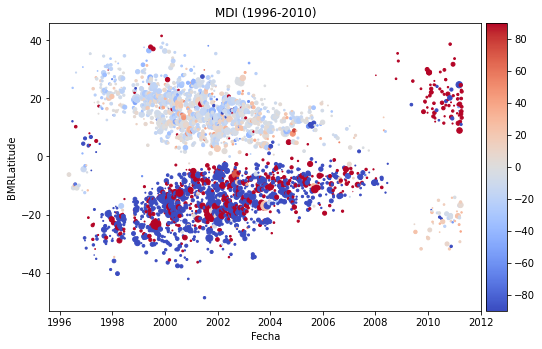

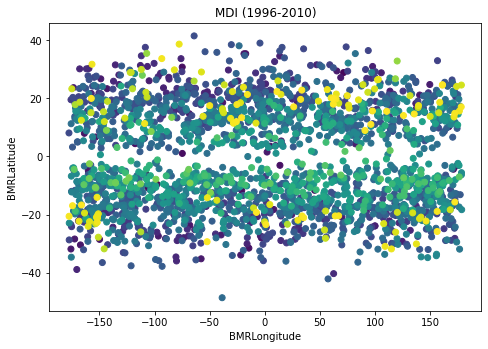

In [159]:
flux = tabla_3['BMRFlux']

# Normalizar flujo

def minmax_norm(df_input):
    return (flux - flux.min()) / (flux.max() - flux.min())

flux_norm = 100 * minmax_norm(flux)

# plot

# spoer
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
c = ax.scatter(tiempo_3, tabla_3['BMRLatitude'], s=flux_norm, c=tabla_3['Tilt_abs'], cmap='coolwarm', vmin=-90, vmax=90)
ax.set_title('MDI (1996-2010)')
ax.set_xlabel('Fecha')
ax.set_ylabel('BMRLatitude')
colorbar_ax = fig.add_axes([1.11, 0.1, 0.05, 1])
fig.colorbar(c, cax=colorbar_ax)
fig.savefig('Tiempo_vs_BMRLatitude/MDI.png', bbox_inches='tight')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
ax.scatter(tabla_3['BMRLongitude'], tabla_3['BMRLatitude'], c=tiempo_3, cmap='viridis')
ax.set_title('MDI (1996-2010)')
ax.set_xlabel('BMRLongitude')
ax.set_ylabel('BMRLatitude')
fig.savefig('BMRLongitude_vs_BMRLatitude/MDI.png', bbox_inches='tight')
plt.show()

In [160]:
if os.path.exists('MDI_(1996-2010)') and os.path.exists('MDI_(1996-2010)/lat-t') and os.path.exists('MDI_(1996-2010)/lat-long'):
    sys.exit('La carpeta ya fue creada')

os.mkdir('MDI_(1996-2010)')
os.mkdir('MDI_(1996-2010)/lat-t')
os.mkdir('MDI_(1996-2010)/lat-long')

for i in range(1996,2011):
    mascara_y = tabla_3['Year'] == i
    for j in range(6):
        mascara_m = np.logical_and(tabla_3['Month'] > 2*j, tabla_3['Month'] < 2*j+3)
        data_d = tabla_3.loc[np.logical_and(mascara_y, mascara_m)]

        mascara_hh23 = np.logical_or(data_d['HH_23n'], data_d['HH_23s'])
        mascara_hh24 = np.logical_or(data_d['HH_24n'], data_d['HH_24s'])
        mascara_hh = np.logical_or(mascara_hh23, mascara_hh24)

        mascara_ah23 = np.logical_or(data_d['AH_23n'], data_d['AH_23s'])
        mascara_ah24 = np.logical_or(data_d['AH_24n'], data_d['AH_24s'])
        mascara_ah = np.logical_or(mascara_ah23, mascara_ah24)

        data = data_d.loc[np.logical_or(mascara_hh,mascara_ah)]
        data_hale = data.loc[mascara_hh]
        data_ahale = data.loc[mascara_ah]


        if data.shape[0] > 0:

            fig = plt.figure()
            ax = fig.add_axes([0.1,0.1,1,1])
            c = ax.scatter(data['Date'], data['BMRLatitude'], c=data['Tilt_abs'], cmap='coolwarm', vmin=-90, vmax=90)
            ax.set_title('MDI (1996-2010)')
            ax.set_xlabel('Fecha')
            ax.set_ylabel('BMRLatitude')
            colorbar_ax = fig.add_axes([1.11, 0.1, 0.05, 1])
            fig.colorbar(c, cax=colorbar_ax)
            fig.savefig('MDI_(1996-2010)/lat-t/'+str(i)+'_'+str(2*j+1)+'_to_'+str(2*j+2)+'Tiempo_vs_BMRLatitude.png', bbox_inches='tight')
            plt.close(fig)

            fig = plt.figure()
            ax = fig.add_axes([0.1,0.1,1,1])
            ax.scatter(data_hale['BMRLongitude'], data_hale['BMRLatitude'], c=data_hale['ReferenceDay'], cmap='coolwarm', marker='o', label='Hale') # Hale
            ax.scatter(data_ahale['BMRLongitude'], data_ahale['BMRLatitude'], c=data_ahale['ReferenceDay'], cmap='coolwarm', marker='s', label='AntiHale' ) # Anti Hale
            ax.legend()
            ax.set_title('MDI (1996-2010)')
            ax.set_xlabel('BMRLongitude')
            ax.set_ylabel('BMRLatitude')
            fig.savefig('MDI_(1996-2010)/lat-t/'+'/'+str(i)+'_'+str(2*j+1)+'_to_'+str(2*j+2)+'BMRLongitude_vs_BMRLatitude.png', bbox_inches='tight')
            plt.close(fig)
        else: None

# HMI (2010-2016)

In [161]:
tiempo_4 = pd.to_datetime(tabla_4.iloc[:,[1,2,3,4,5,6]])
tabla_4['Date'] = tiempo_4
indices_4 = tabla_4.set_index(['Date'])

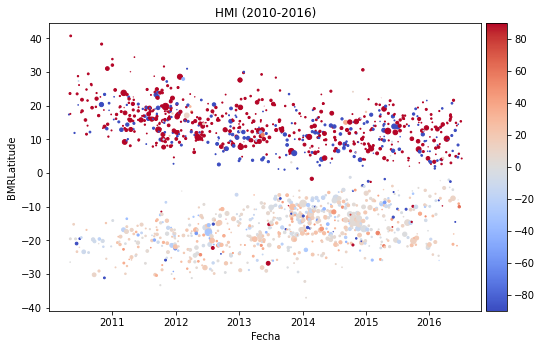

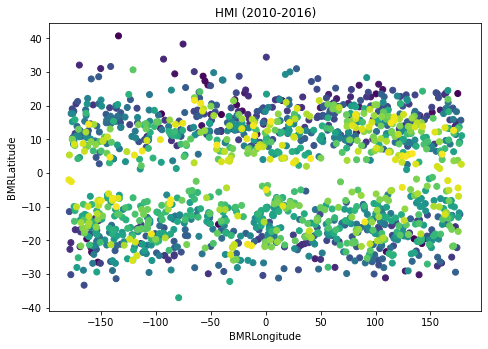

In [162]:
flux = tabla_4['BMRFlux']

# Normalizar flujo

def minmax_norm(df_input):
    return (flux - flux.min()) / (flux.max() - flux.min())

flux_norm = 100 * minmax_norm(flux)

# plot

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
c = ax.scatter(tiempo_4, tabla_4['BMRLatitude'], s=flux_norm, c=tabla_4['Tilt_abs'], cmap='coolwarm', vmin=-90, vmax=90)
ax.set_title('HMI (2010-2016)')
ax.set_xlabel('Fecha')
ax.set_ylabel('BMRLatitude')
colorbar_ax = fig.add_axes([1.11, 0.1, 0.05, 1])
fig.colorbar(c, cax=colorbar_ax)
fig.savefig('Tiempo_vs_BMRLatitude/HMI.png', bbox_inches='tight')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
ax.scatter(tabla_4['BMRLongitude'], tabla_4['BMRLatitude'], c=tiempo_4, cmap='viridis')
ax.set_title('HMI (2010-2016)')
ax.set_xlabel('BMRLongitude')
ax.set_ylabel('BMRLatitude')
fig.savefig('BMRLongitude_vs_BMRLatitude/HMI.png', bbox_inches='tight')
plt.show()

In [163]:
# revisar si las carpetas fueron creadas

if os.path.exists('HMI_(2010-2016)') and os.path.exists('HMI_(2010-2016)/lat-t') and os.path.exists('HMI_(2010-2016)/lat-long'):
    sys.exit('La carpeta ya fue creada')

# crear folder

os.mkdir('HMI_(2010-2016)')
os.mkdir('HMI_(2010-2016)/lat-t')
os.mkdir('HMI_(2010-2016)/lat-long')

# plots

for i in range(2010,2017):
    mascara_y = tabla_4['Year'] == i
    for j in range(6):
        mascara_m = np.logical_and(tabla_4['Month'] > 2*j, tabla_4['Month'] < 2*j+3)
        data_d = tabla_4.loc[np.logical_and(mascara_y, mascara_m)]

        mascara_hh24 = np.logical_or(data_d['HH_24n'], data_d['HH_24s'])
        mascara_ah24 = np.logical_or(data_d['AH_24n'], data_d['AH_24s'])
        
        data = data_d.loc[np.logical_or(mascara_hh24,mascara_ah24)]
        data_hale = data.loc[mascara_hh24]
        data_ahale = data.loc[mascara_ah24]


        if data.shape[0] > 0:

            fig = plt.figure()
            ax = fig.add_axes([0.1,0.1,1,1])
            c = ax.scatter(data['Date'], data['BMRLatitude'], c=data['Tilt_abs'], cmap='coolwarm', vmin=-90, vmax=90)
            ax.set_title('HMI (2010-2016)')
            ax.set_xlabel('Fecha')
            ax.set_ylabel('BMRLatitude')
            colorbar_ax = fig.add_axes([1.11, 0.1, 0.05, 1])
            fig.colorbar(c, cax=colorbar_ax)
            fig.savefig('HMI_(2010-2016)/lat-t/'+str(i)+'_'+str(2*j+1)+'_to_'+str(2*j+2)+'Tiempo_vs_BMRLatitude.png', bbox_inches='tight')
            plt.close(fig)

            fig = plt.figure()
            ax = fig.add_axes([0.1,0.1,1,1])
            ax.scatter(data_hale['BMRLongitude'], data_hale['BMRLatitude'], c=data_hale['ReferenceDay'], cmap='coolwarm', marker='o', label='Hale') # Hale
            ax.scatter(data_ahale['BMRLongitude'], data_ahale['BMRLatitude'], c=data_ahale['ReferenceDay'], cmap='coolwarm', marker='s', label='AntiHale' ) # Anti Hale
            ax.legend()
            ax.set_title('HMI (2010-2016)')
            ax.set_xlabel('BMRLongitude')
            ax.set_ylabel('BMRLatitude')
            fig.savefig('HMI_(2010-2016)/lat-long'+'/'+str(i)+'_'+str(2*j+1)+'_to_'+str(2*j+2)+'BMRLongitude_vs_BMRLatitude.png', bbox_inches='tight')
            plt.close(fig)

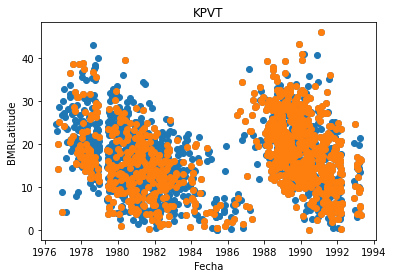

In [164]:
mascara = tabla_1['BMRLatitude'] > 0

plt.scatter(tiempo_1[mascara], tabla_1.loc[mascara, 'BMRLatitude'])
plt.xlabel('Fecha')
plt.ylabel('BMRLatitude')

mascara = np.logical_and(tabla_1['BMRLatitude'] > 0, tabla_1['Tilt_abs'] > 0)

plt.scatter(tiempo_1[mascara], tabla_1.loc[mascara, 'BMRLatitude'])
plt.title('KPVT')
plt.xlabel('Fecha')
plt.ylabel('BMRLatitude')
plt.show()